# SpaCy NER Analysis

In [1]:
import pandas as pd
import os

### Get Data

In [2]:
df_ent = pd.read_csv(os.path.join("..", "Data", "merged_spacy_and_geo_v2.csv")).drop("Unnamed: 0", axis=1)
df_ent

,description,spacy_entities,GeoName_Count,Geographic_LATITUDE,Geographic_LONGITUDE,Geographic_NAME,Optional_LATITUDE1,Optional_LATITUDE2,Optional_LATITUDE3,Optional_LATITUDE4,Optional_LONGITUDE1,Optional_LONGITUDE2,Optional_LONGITUDE3,Optional_LONGITUDE4,Optional_NAME1,Optional_NAME2,Optional_NAME3,Optional_NAME4
0,Ada witch - Sometimes you can see a misty blue...,"Ada witch -, PERSON\n3-mile, QUANTITY\nthe Ada...",2,NaN,NaN,NaN,43.0125,43.00142,NaN,NaN,-85.50056,-85.49169,NaN,NaN,Egypt Valley Country Club,Findlay Cemetery,NaN,NaN
1,A little girl was killed suddenly while waitin...,"month later, DATE\nthis day, DATE\n\n",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,If you take Gorman Rd. west towards Sand Creek...,"Gorman Rd, PERSON\nSand Creek, FAC\nA mile, QU...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"In the 1970's, one room, room 211, in the old ...","1970, DATE\none, CARDINAL\n211, CARDINAL\ntoda...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kappa Delta Sorority - The Kappa Delta Sororit...,Kappa Delta Sorority - The Kappa Delta Sororit...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,at 12 midnight you can see a lady with two lit...,"12 midnight, TIME\ntwo, CARDINAL\nSheridan St....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10976,Is haunted by the victims of a murder that hap...,"years ago, DATE\n\n",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10977,The institution was for kids 18 years old and ...,"18 years old, DATE\n70, DATE\none, CARDINAL\nh...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10978,Gymnasium - their have been reports of a littl...,\n,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv(os.path.join("..", "Data", "v1.tsv"), sep='\t')
for col in df.columns:
    print(col)

city
country
description
location
state
state_abbrev
longitude
latitude
city_longitude
city_latitude
clean_description
clean_spelling
Audio Evidence
Audio Reasoning
time_of_day
Witness Count
Witness Reasoning
tokenized
pos_tokenized
filtered_tokenized
lemma_filtered_tokenized
lemma_pos_tokenized
Event
apparition_types
apparition_descriptors
apparition_gender
apparition_age
apparition_types_str
apparition_descriptors_str
apparition_gender_str
apparition_age_str
unique_apparition_mentions
adjectives
unique_app_descriptor_mentions
FBI.Population.Covered
Murder per capita
Violent Crime per capita
Property Crime per capita
Undergrad_Grad_Rate
HS_Grad_Rate
STEM_Grad_Percentage
Visual Evidence
Visual Reasoning
death_rate_Alzheimer's disease
death_rate_Cancer
death_rate_Heart disease
death_rate_Unintentional injuries
death_rate_All causes
death_rate_Influenza and pneumonia
death_rate_Suicide
death_rate_Kidney disease
death_rate_CLRD
death_rate_Diabetes
Haunted Places Date
Alcohol Deaths
Alcoho

### Get Sample

In [4]:
def get_sample(df: pd.DataFrame, i: int, cols: list[str]=None) -> pd.core.series.Series:
    if not cols:
        return df.iloc[i]
    return df[cols].iloc[i]

In [5]:
get_sample(df_ent, 0)

description             Ada witch - Sometimes you can see a misty blue...
spacy_entities          Ada witch -, PERSON\n3-mile, QUANTITY\nthe Ada...
GeoName_Count                                                           2
Geographic_LATITUDE                                                   NaN
Geographic_LONGITUDE                                                  NaN
Geographic_NAME                                                       NaN
Optional_LATITUDE1                                                43.0125
Optional_LATITUDE2                                               43.00142
Optional_LATITUDE3                                                    NaN
Optional_LATITUDE4                                                    NaN
Optional_LONGITUDE1                                             -85.50056
Optional_LONGITUDE2                                             -85.49169
Optional_LONGITUDE3                                                   NaN
Optional_LONGITUDE4                   

In [6]:
get_sample(df, 0, ['Witness Count'])

Witness Count    3+
Name: 0, dtype: object

## Analysis
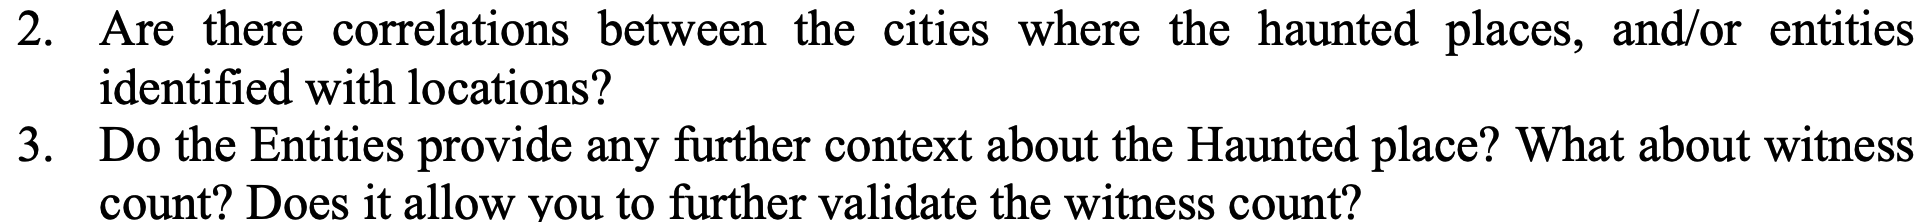